In [1]:
# -*- coding: utf-8 -*- 
# @Time : 2024/2/5 16:00
# @Author : Ismail Bibers
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the Simargl 2022 dataset. 
# implemented Decision Tree Classifier. 

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/Simargl2022_combined_dataset.csv')

# Drop duplicates: same observation but multiple occurences
main_df_1 = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value, the model wont learn form columns like this.
one_value = main_df_1.columns[main_df_1.nunique() == 1]
main_df_2 = main_df_1.drop(columns = one_value, axis=1)


/tmp/ipykernel_744746/3441968052.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_744746/3441968052.py:17: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/Simargl2022_combined_dataset.csv')


In [2]:
# Take random samples of the dataset
# sample_df_1 = main_df_2.sample(frac=0.6, random_state=42)
sample_df_1 = main_df_2.copy()

In [3]:
# Extract subsample of data
print (" Extract subsample of data: ")
print(sample_df_1['ALERT'].value_counts())

 Extract subsample of data: 
ALERT
Denial of Service    5138973
Port Scanning        4170194
Malware                  571
Name: count, dtype: int64


In [4]:
# Git the features
print (main_df_2.head())

     FLOW_ID PROTOCOL_MAP  L4_SRC_PORT   IPV4_SRC_ADDR  L4_DST_PORT  \
0  334626451          tcp        50242  10.114.241.191          443   
1  334626948          tcp        50244  10.114.241.191          443   
2  334627641          tcp        50246  10.114.241.191          443   
3  334628195          tcp        50248  10.114.241.191          443   
4  334628673          tcp        54328  10.114.241.191          443   

   IPV4_DST_ADDR  FIRST_SWITCHED  FLOW_DURATION_MILLISECONDS  LAST_SWITCHED  \
0  10.114.224.73      1647344604                         105     1647344604   
1  10.114.224.73      1647344609                           6     1647344609   
2  10.114.224.73      1647344614                         111     1647344614   
3  10.114.224.73      1647344619                           6     1647344619   
4  10.114.224.73      1647344534                      110000     1647344644   

   PROTOCOL  ...  SRC_TOS  DST_TOS  TOTAL_FLOWS_EXP  IN_BYTES  IN_PKTS  \
0         6  ...        

In [5]:
sample_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24359068 entries, 0 to 30148257
Data columns (total 28 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   FLOW_ID                     int64  
 1   PROTOCOL_MAP                object 
 2   L4_SRC_PORT                 int64  
 3   IPV4_SRC_ADDR               object 
 4   L4_DST_PORT                 int64  
 5   IPV4_DST_ADDR               object 
 6   FIRST_SWITCHED              int64  
 7   FLOW_DURATION_MILLISECONDS  int64  
 8   LAST_SWITCHED               int64  
 9   PROTOCOL                    int64  
 10  TCP_FLAGS                   int64  
 11  TCP_WIN_MAX_IN              int64  
 12  TCP_WIN_MAX_OUT             int64  
 13  TCP_WIN_MIN_IN              int64  
 14  TCP_WIN_MIN_OUT             int64  
 15  TCP_WIN_MSS_IN              int64  
 16  TCP_WIN_SCALE_IN            int64  
 17  TCP_WIN_SCALE_OUT           int64  
 18  SRC_TOS                     int64  
 19  DST_TOS                 

In [6]:
# # To see the features that are need to be encoded "Which are not numerical"
# categorical_columns = sample_df_1.select_dtypes(include=['object']).columns
# print("Categorical Columns:", categorical_columns)

In [7]:
# # Count the numner of the novsalues in the categorical columns
# print(sample_df_1.isna().sum())

In [8]:
# # Print the columns with leading spaces, if any
# columns_with_leading_spaces = [col for col in main_df_2.columns if col.startswith(' ')]

# if columns_with_leading_spaces:
#     print("Columns with leading spaces:", columns_with_leading_spaces)
# else:
#     print("No columns with leading spaces found.")

# # Remove leading space character in all feature names
# # main_df_2.rename(columns=lambda x: x.lstrip(), inplace=True)


In [6]:
# sample_df_1 = sample_df_1.drop(['ANOMALY', 'IPV4_SRC_ADDR'] , axis=1)
median_anomaly = sample_df_1['ANOMALY'].median()
sample_df_1['ANOMALY'].fillna(median_anomaly, inplace=True)

/tmp/ipykernel_744746/2239558539.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_df_1['ANOMALY'].fillna(median_anomaly, inplace=True)


In [7]:
sample_df_1['ALERT'].fillna('Normal', inplace=True)

/tmp/ipykernel_744746/2012478311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_df_1['ALERT'].fillna('Normal', inplace=True)


In [8]:
# Extract subsample of data
print(" Extract subsample of data: ")
print(sample_df_1['ALERT'].value_counts())

 Extract subsample of data: 
ALERT
Normal               15049330
Denial of Service     5138973
Port Scanning         4170194
Malware                   571
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['PROTOCOL_MAP', 'IPV4_DST_ADDR', 'IPV4_SRC_ADDR']

# Create a copy of the original DataFrame to avoid modifying the original data
df_encoded = sample_df_1.copy()

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
df_encoded[categorical_columns] = ordinal_encoder.fit_transform(sample_df_1[categorical_columns])

In [12]:
# # Fill nan values
# print(sample_df_1.isna().sum())

In [10]:
print("Sampled Dataset Overview:")

dropped_df = ['ALERT']
X = df_encoded.drop(dropped_df, axis=1)
y = df_encoded['ALERT']

Sampled Dataset Overview:


In [11]:
# Initial train test split set and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.neural_network import MLPClassifier
# Initialize the MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(
    10,), max_iter=1000, random_state=42)

# Print the number of samples before training
print("Number of samples before training:", len(X_train))

Number of samples before training: 19487254


In [15]:
# Train the Decision Tree model
nn_model.fit(X_train, y_train)

# Print the number of samples after training
print("Number of samples after training:", len(X_train))

: 

In [ ]:
# Make predictions on the test set
y_pred_encoded = nn_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_encoded)
print(f"Accuracy: {accuracy}")

In [ ]:
#  Classificaiton Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred_encoded))


In [ ]:
import numpy as np
# Confusion matrix with string labels
conf_mat = confusion_matrix(y_test, y_pred_encoded)

# Get unique class labels from y_test and y_pred_encoded
unique_labels = np.unique(np.concatenate((y_test, y_pred_encoded)))

# Plotting the Confusion Matrix with class labels
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Extract weights from the first hidden layer
weights_first_hidden_layer = nn_model.coefs_[0]

# Calculate feature importance based on the weights
feature_importance = np.abs(weights_first_hidden_layer).mean(axis=0)

# Create a DataFrame for visualization
importance_dict = dict(zip(X.columns.values, feature_importance))
sorted_importance = dict(
    sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_importance.values()), y=list(
    sorted_importance.keys()), palette='mako')
plt.xlabel('Average Weight Magnitude in First Hidden Layer')
plt.ylabel('Feature Name')
plt.title('Feature Importance in MLPClassifier')
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv(
    '/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/Simargl_cleaned_data.csv')

tf.keras.backend.clear_session()

/tmp/ipykernel_1721873/3192428586.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-26 14:53:08.966478: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 14:53:09.024236: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 14:

In [2]:
dropped_df = ['ALERT']
X = df.drop(dropped_df, axis=1)
y = df['ALERT']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initial train test split set and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y)

In [3]:
# Convert data to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(pd.factorize(y_train)[0], dtype=tf.int64)
X_test_tf = tf.convert_to_tensor(X_test.values, dtype=tf.float32)

# Initialize MirroredStrategy for GPU acceleration
strategy = tf.distribute.MirroredStrategy()


# Train the models
with strategy.scope():
    
    from sklearn.neural_network import MLPClassifier
    # Initialize the MLPClassifier
    nn_model = MLPClassifier(hidden_layer_sizes=(
        10,), max_iter=1000, random_state=42)
    
    # Train the Decision Tree model
    nn_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_encoded = nn_model.predict(X_test)
    

2024-02-26 15:12:10.103840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1047 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:67:00.0, compute capability: 8.6
2024-02-26 15:12:10.104448: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 1046 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:68:00.0, compute capability: 8.6


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [4]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_encoded)
print(f"Accuracy: {accuracy}")

Accuracy: 0.76664341661778


In [5]:
# Use inverse_transform to get original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_test_labels = label_encoder.inverse_transform(y_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Classification Report:


/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

Denial of Service       0.77      1.00      0.87    497905
          Malware       0.00      0.00      0.00       114
    Port Scanning       0.00      0.00      0.00    151442

         accuracy                           0.77    649461
        macro avg       0.26      0.33      0.29    649461
     weighted avg       0.59      0.77      0.67    649461



/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


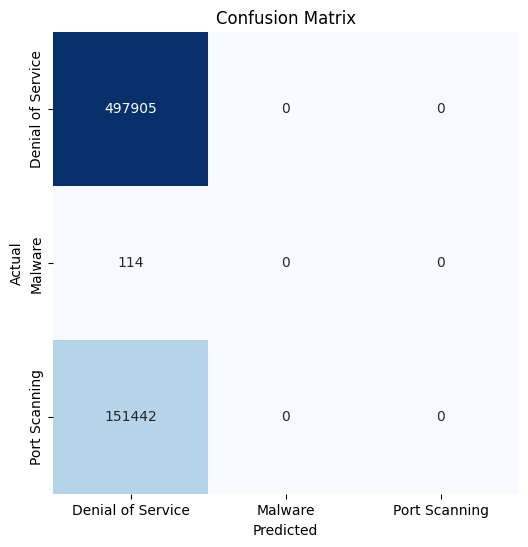

In [6]:

# Confusion matrix with string labels
conf_mat = confusion_matrix(y_test_labels, y_pred)

# Get unique class labels from y_test and y_pred_encoded
unique_labels = np.unique(np.concatenate(
    (y_test_labels, y_pred)))

# Plotting the Confusion Matrix with class labels
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipykernel_1721873/3736126712.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_importance.values()), y=list(


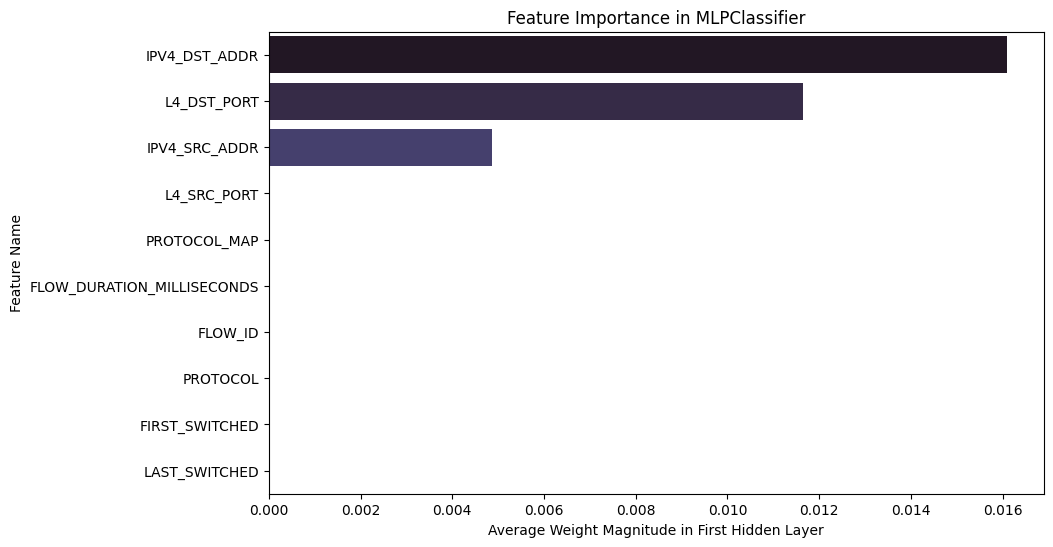

In [7]:
# Extract weights from the first hidden layer
weights_first_hidden_layer = nn_model.coefs_[0]

# Calculate feature importance based on the weights
feature_importance = np.abs(weights_first_hidden_layer).mean(axis=0)

# Create a DataFrame for visualization
importance_dict = dict(zip(X.columns.values, feature_importance))
sorted_importance = dict(
    sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_importance.values()), y=list(
    sorted_importance.keys()), palette='mako')
plt.xlabel('Average Weight Magnitude in First Hidden Layer')
plt.ylabel('Feature Name')
plt.title('Feature Importance in MLPClassifier')
plt.show()